In [ ]:
print("Hello")

Hello


In [ ]:
!pip install transformers torch torchvision matplotlib


In [ ]:
import torch
import torchvision.transforms as T
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from io import BytesIO  # Needed for handling image data


In [ ]:
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


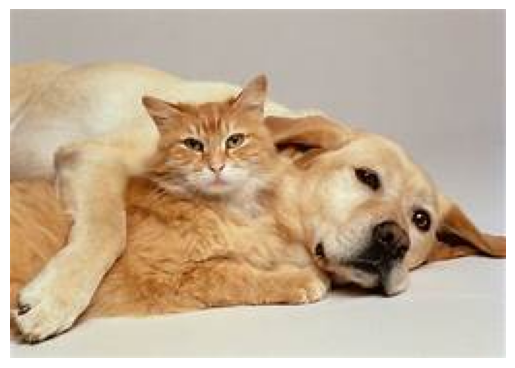

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Use a valid image URL
image_url = "https://tse4.mm.bing.net/th?id=OIP.9CIfM8GBNQaTHtseyv0oSgHaFM&pid=Api&P=0&h=180"
# Fetch the image
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("RGB")

# Display the image
plt.imshow(image)
plt.axis("off")
plt.show()



In [ ]:
# Transform the image for model input
inputs = processor(images=image, return_tensors="pt")


In [ ]:
# Run inference (disable gradient computation for efficiency)
with torch.no_grad():
    outputs = model(**inputs)


In [ ]:
# Get bounding boxes and labels
target_sizes = torch.tensor([image.size[::-1]])  # (height, width)
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]


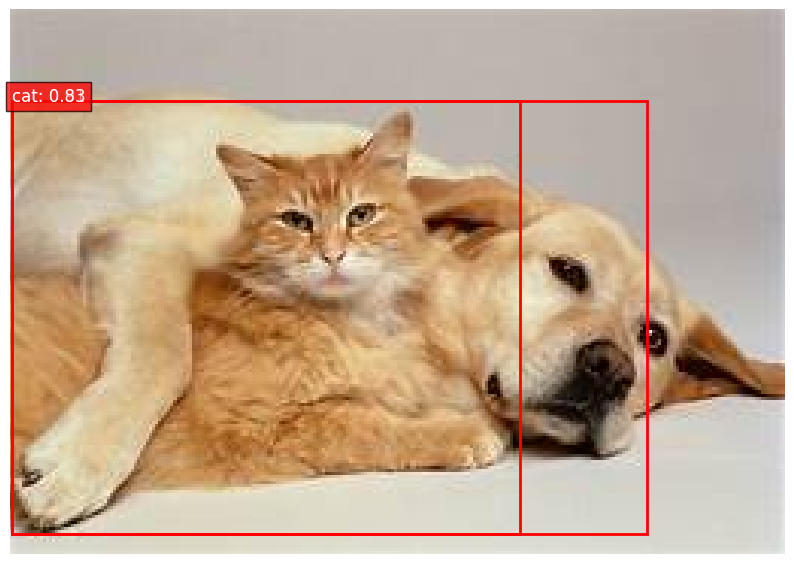

In [ ]:
# Plot the image and detected objects
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)

# Draw bounding boxes
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    if score > 0.7:  # Show only high-confidence detections
        box = [int(i) for i in box]
        x, y, w, h = box

        # Create a rectangle patch
        rect = patches.Rectangle((x, y), w - x, h - y, linewidth=2, edgecolor="red", facecolor="none")
        ax.add_patch(rect)

        # Display label and confidence
        text = f"{model.config.id2label[label.item()]}: {score:.2f}"
        ax.text(x, y, text, fontsize=12, color="white", bbox=dict(facecolor="red", alpha=0.5))

plt.axis("off")
plt.show()


In [27]:
import os
from PIL import Image

# Path to your images folder
data_folder = "data"

# List all image files in the folder
image_files = [f for f in os.listdir(data_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Open and check images
for img_name in image_files:
    img_path = os.path.join(data_folder, img_name)

    try:
        image = Image.open(img_path).convert("RGB")  # Ensure RGB format
        print(f"✅ Loaded: {img_name} - Size: {image.size}")
    except Exception as e:
        print(f"❌ Error loading {img_name}: {e}")


✅ Loaded: th (2).jpg - Size: (270, 180)
✅ Loaded: th.jpg - Size: (288, 180)
✅ Loaded: th (1).jpg - Size: (270, 180)
✅ Loaded: th (4).jpg - Size: (320, 180)
✅ Loaded: th (3).jpg - Size: (240, 180)


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


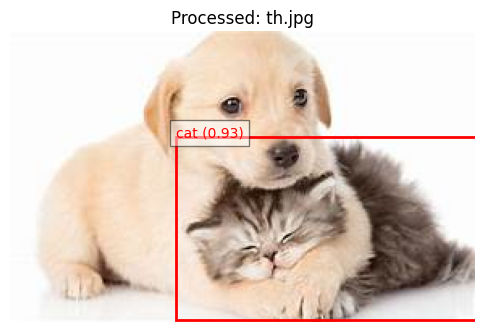

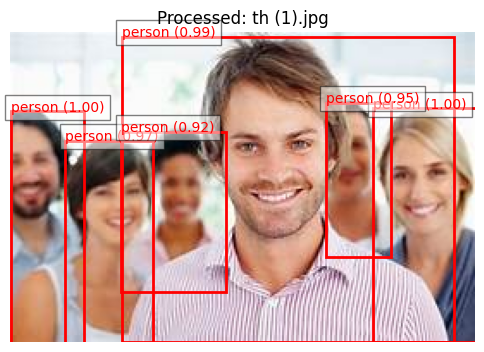

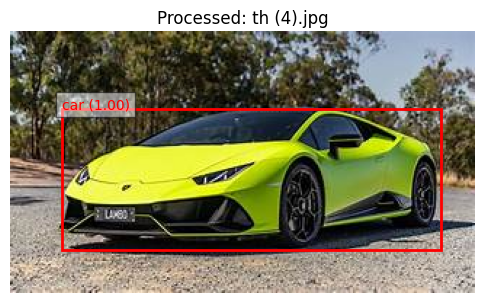

In [31]:
import os
import torch
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from transformers import DetrImageProcessor, DetrForObjectDetection

# Path to the "data" folder
data_folder = "data"

# Load pretrained model (DETR: Facebook's Vision Transformer for Object Detection)
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

# List all images in the folder
image_files = [f for f in os.listdir(data_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Process each image
for img_name in image_files:
    img_path = os.path.join(data_folder, img_name)

    # Open and process the image
    image = Image.open(img_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")

    # Run model and get predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get bounding boxes and labels
    target_sizes = torch.tensor([image.size[::-1]])  # Convert (W, H) -> (H, W)
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

    # Plot results
    plt.figure(figsize=(6, 6))
    plt.imshow(image)

    # Draw bounding boxes
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        x, y, w, h = box
        plt.gca().add_patch(plt.Rectangle((x, y), w-x, h-y, fill=False, color="red", linewidth=2))
        plt.text(x, y, f"{model.config.id2label[label.item()]} ({score:.2f})", color="red", fontsize=10, bbox=dict(facecolor="white", alpha=0.5))

    plt.axis("off")
    plt.title(f"Processed: {img_name}")
    plt.show()


In [30]:
import os
from PIL import Image
import numpy as np

# Path to your images folder
data_folder = "data"

# List all image files in the folder
image_files = [f for f in os.listdir(data_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Store image sizes
image_sizes = []

print(f"📂 Found {len(image_files)} images in '{data_folder}'\n")

# Process each image
for img_name in image_files:
    img_path = os.path.join(data_folder, img_name)

    try:
        with Image.open(img_path) as img:
            img = img.convert("RGB")  # Ensure RGB format
            img_size_kb = round(os.path.getsize(img_path) / 1024, 2)  # Get size in KB

            # Store dimensions
            width, height = img.size
            image_sizes.append((width, height))

            print(f"✅ Loaded: {img_name} | Size: {width}x{height} | File Size: {img_size_kb} KB")

    except Exception as e:
        print(f"❌ Error loading {img_name}: {e}")

# Compute average image size
if image_sizes:
    avg_width = int(np.mean([w for w, h in image_sizes]))
    avg_height = int(np.mean([h for w, h in image_sizes]))
    print(f"\n📏 Average Image Size: {avg_width}x{avg_height} pixels")
else:
    print("\n⚠️ No valid images found!")



📂 Found 3 images in 'data'

✅ Loaded: th.jpg | Size: 288x180 | File Size: 6.49 KB
✅ Loaded: th (1).jpg | Size: 270x180 | File Size: 9.75 KB
✅ Loaded: th (4).jpg | Size: 320x180 | File Size: 16.62 KB

📏 Average Image Size: 292x180 pixels


#Training VIT

In [32]:
#Training VIT
!pip install torch torchvision transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.


In [38]:
!mkdir coco
!cd coco
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip train2017.zip -d coco
!unzip annotations_trainval2017.zip -d coco



Streaming output truncated to the last 5000 lines.
 extracting: coco/train2017/000000563584.jpg  
 extracting: coco/train2017/000000276069.jpg  
 extracting: coco/train2017/000000401194.jpg  
 extracting: coco/train2017/000000502089.jpg  
 extracting: coco/train2017/000000192183.jpg  
 extracting: coco/train2017/000000425127.jpg  
 extracting: coco/train2017/000000126766.jpg  
 extracting: coco/train2017/000000324161.jpg  
 extracting: coco/train2017/000000452746.jpg  
 extracting: coco/train2017/000000423782.jpg  
 extracting: coco/train2017/000000546343.jpg  
 extracting: coco/train2017/000000249290.jpg  
 extracting: coco/train2017/000000025529.jpg  
 extracting: coco/train2017/000000316928.jpg  
 extracting: coco/train2017/000000337866.jpg  
 extracting: coco/train2017/000000547768.jpg  
 extracting: coco/train2017/000000423162.jpg  
 extracting: coco/train2017/000000224149.jpg  
 extracting: coco/train2017/000000117841.jpg  
 extracting: coco/train2017/000000251660.jpg  
 extracti

In [39]:
from pycocotools.coco import COCO

# Path to COCO annotations
ann_file = "/content/coco/annotations/instances_train2017.json"

# Load annotations
coco = COCO(ann_file)

# Get image IDs
image_ids = coco.getImgIds()
print("Total Images in COCO:", len(image_ids))

# Get categories
cats = coco.loadCats(coco.getCatIds())
categories = {cat["id"]: cat["name"] for cat in cats}
print("Categories:", categories)


loading annotations into memory...
Done (t=14.98s)
creating index...
index created!
Total Images in COCO: 118287
Categories: {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 

#Sample test Case

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


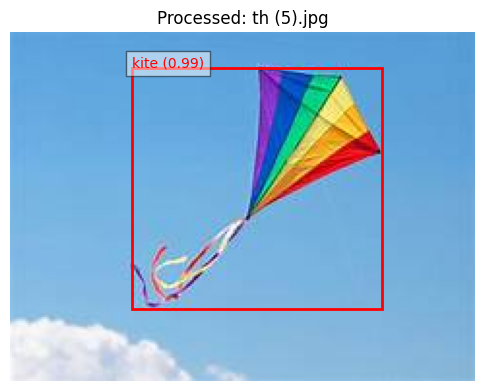

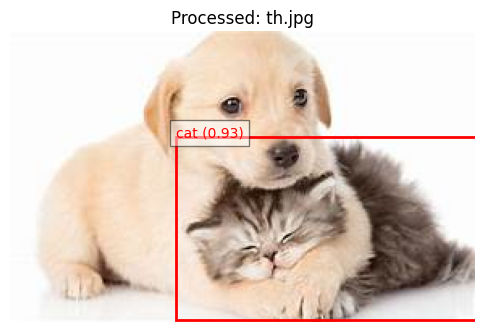

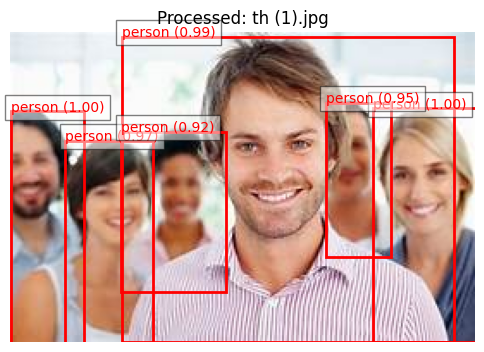

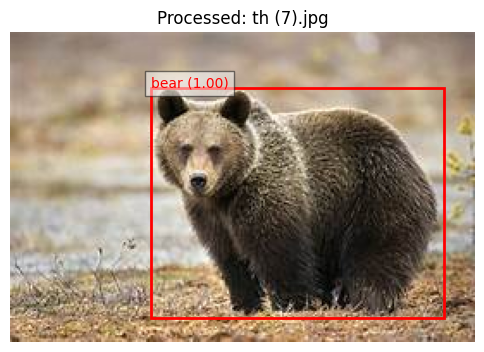

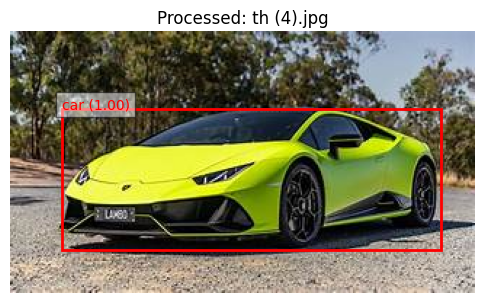

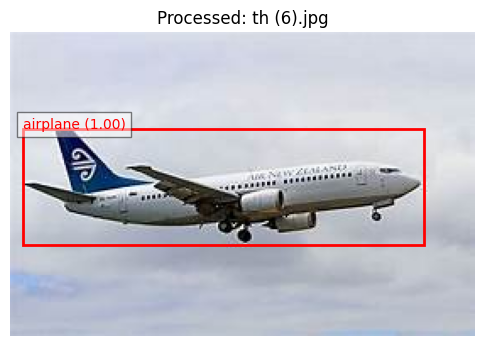

In [42]:
import os
import torch
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from transformers import DetrImageProcessor, DetrForObjectDetection

# Path to the "data" folder
data_folder = "data"

# Load pretrained model (DETR: Facebook's Vision Transformer for Object Detection)
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

# List all images in the folder
image_files = [f for f in os.listdir(data_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Process each image
for img_name in image_files:
    img_path = os.path.join(data_folder, img_name)

    # Open and process the image
    image = Image.open(img_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")

    # Run model and get predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Get bounding boxes and labels
    target_sizes = torch.tensor([image.size[::-1]])  # Convert (W, H) -> (H, W)
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

    # Plot results
    plt.figure(figsize=(6, 6))
    plt.imshow(image)

    # Draw bounding boxes
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        x, y, w, h = box
        plt.gca().add_patch(plt.Rectangle((x, y), w-x, h-y, fill=False, color="red", linewidth=2))
        plt.text(x, y, f"{model.config.id2label[label.item()]} ({score:.2f})", color="red", fontsize=10, bbox=dict(facecolor="white", alpha=0.5))

    plt.axis("off")
    plt.title(f"Processed: {img_name}")
    plt.show()
